<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras_preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 1be5202dab64d861a7118c0e0a9f26db1ea5f758

numpy              : 1.23.5
pandas             : 1.5.3
tensorflow         : 2.12.0
keras_preprocessing: 1.1.2
matplotlib         : 3.7.2
watermark          : 2.4.2
keras              : 2.12.0



Load default figure style

In [3]:
plt.style.use('d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(SimpleRNN(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 31s 148ms/step - loss: 0.6719 - accuracy: 0.5722 - val_loss: 0.6371 - val_accuracy: 0.6335
Epoch 2/10
196/196 [==============================] - 35s 180ms/step - loss: 0.4568 - accuracy: 0.7984 - val_loss: 0.3899 - val_accuracy: 0.8365
Epoch 3/10
196/196 [==============================] - 38s 194ms/step - loss: 0.2609 - accuracy: 0.8977 - val_loss: 0.4711 - val_accuracy: 0.7852
Epoch 4/10
196/196 [==============================] - 35s 180ms/step - loss: 0.1372 - accuracy: 0.9543 - val_loss: 0.4587 - val_accuracy: 0.8180
Epoch 5/10
196/196 [==============================] - 27s 139ms/step - loss: 0.0602 - accuracy: 0.9846 - val_loss: 0.5315 - val_accuracy: 0.8232
Epoch 6/10
196/196 [==============================] - 21s 108ms/step - loss: 0.0278 - accuracy: 0.9944 - val_loss: 0.5953 - val_accuracy: 0.8117
Epoch 7/10
196/196 [==============================] - 28s 144ms/step - loss: 0.0144 - accuracy: 0.9981 - val_loss: 0.6470 - val_ac

In [9]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

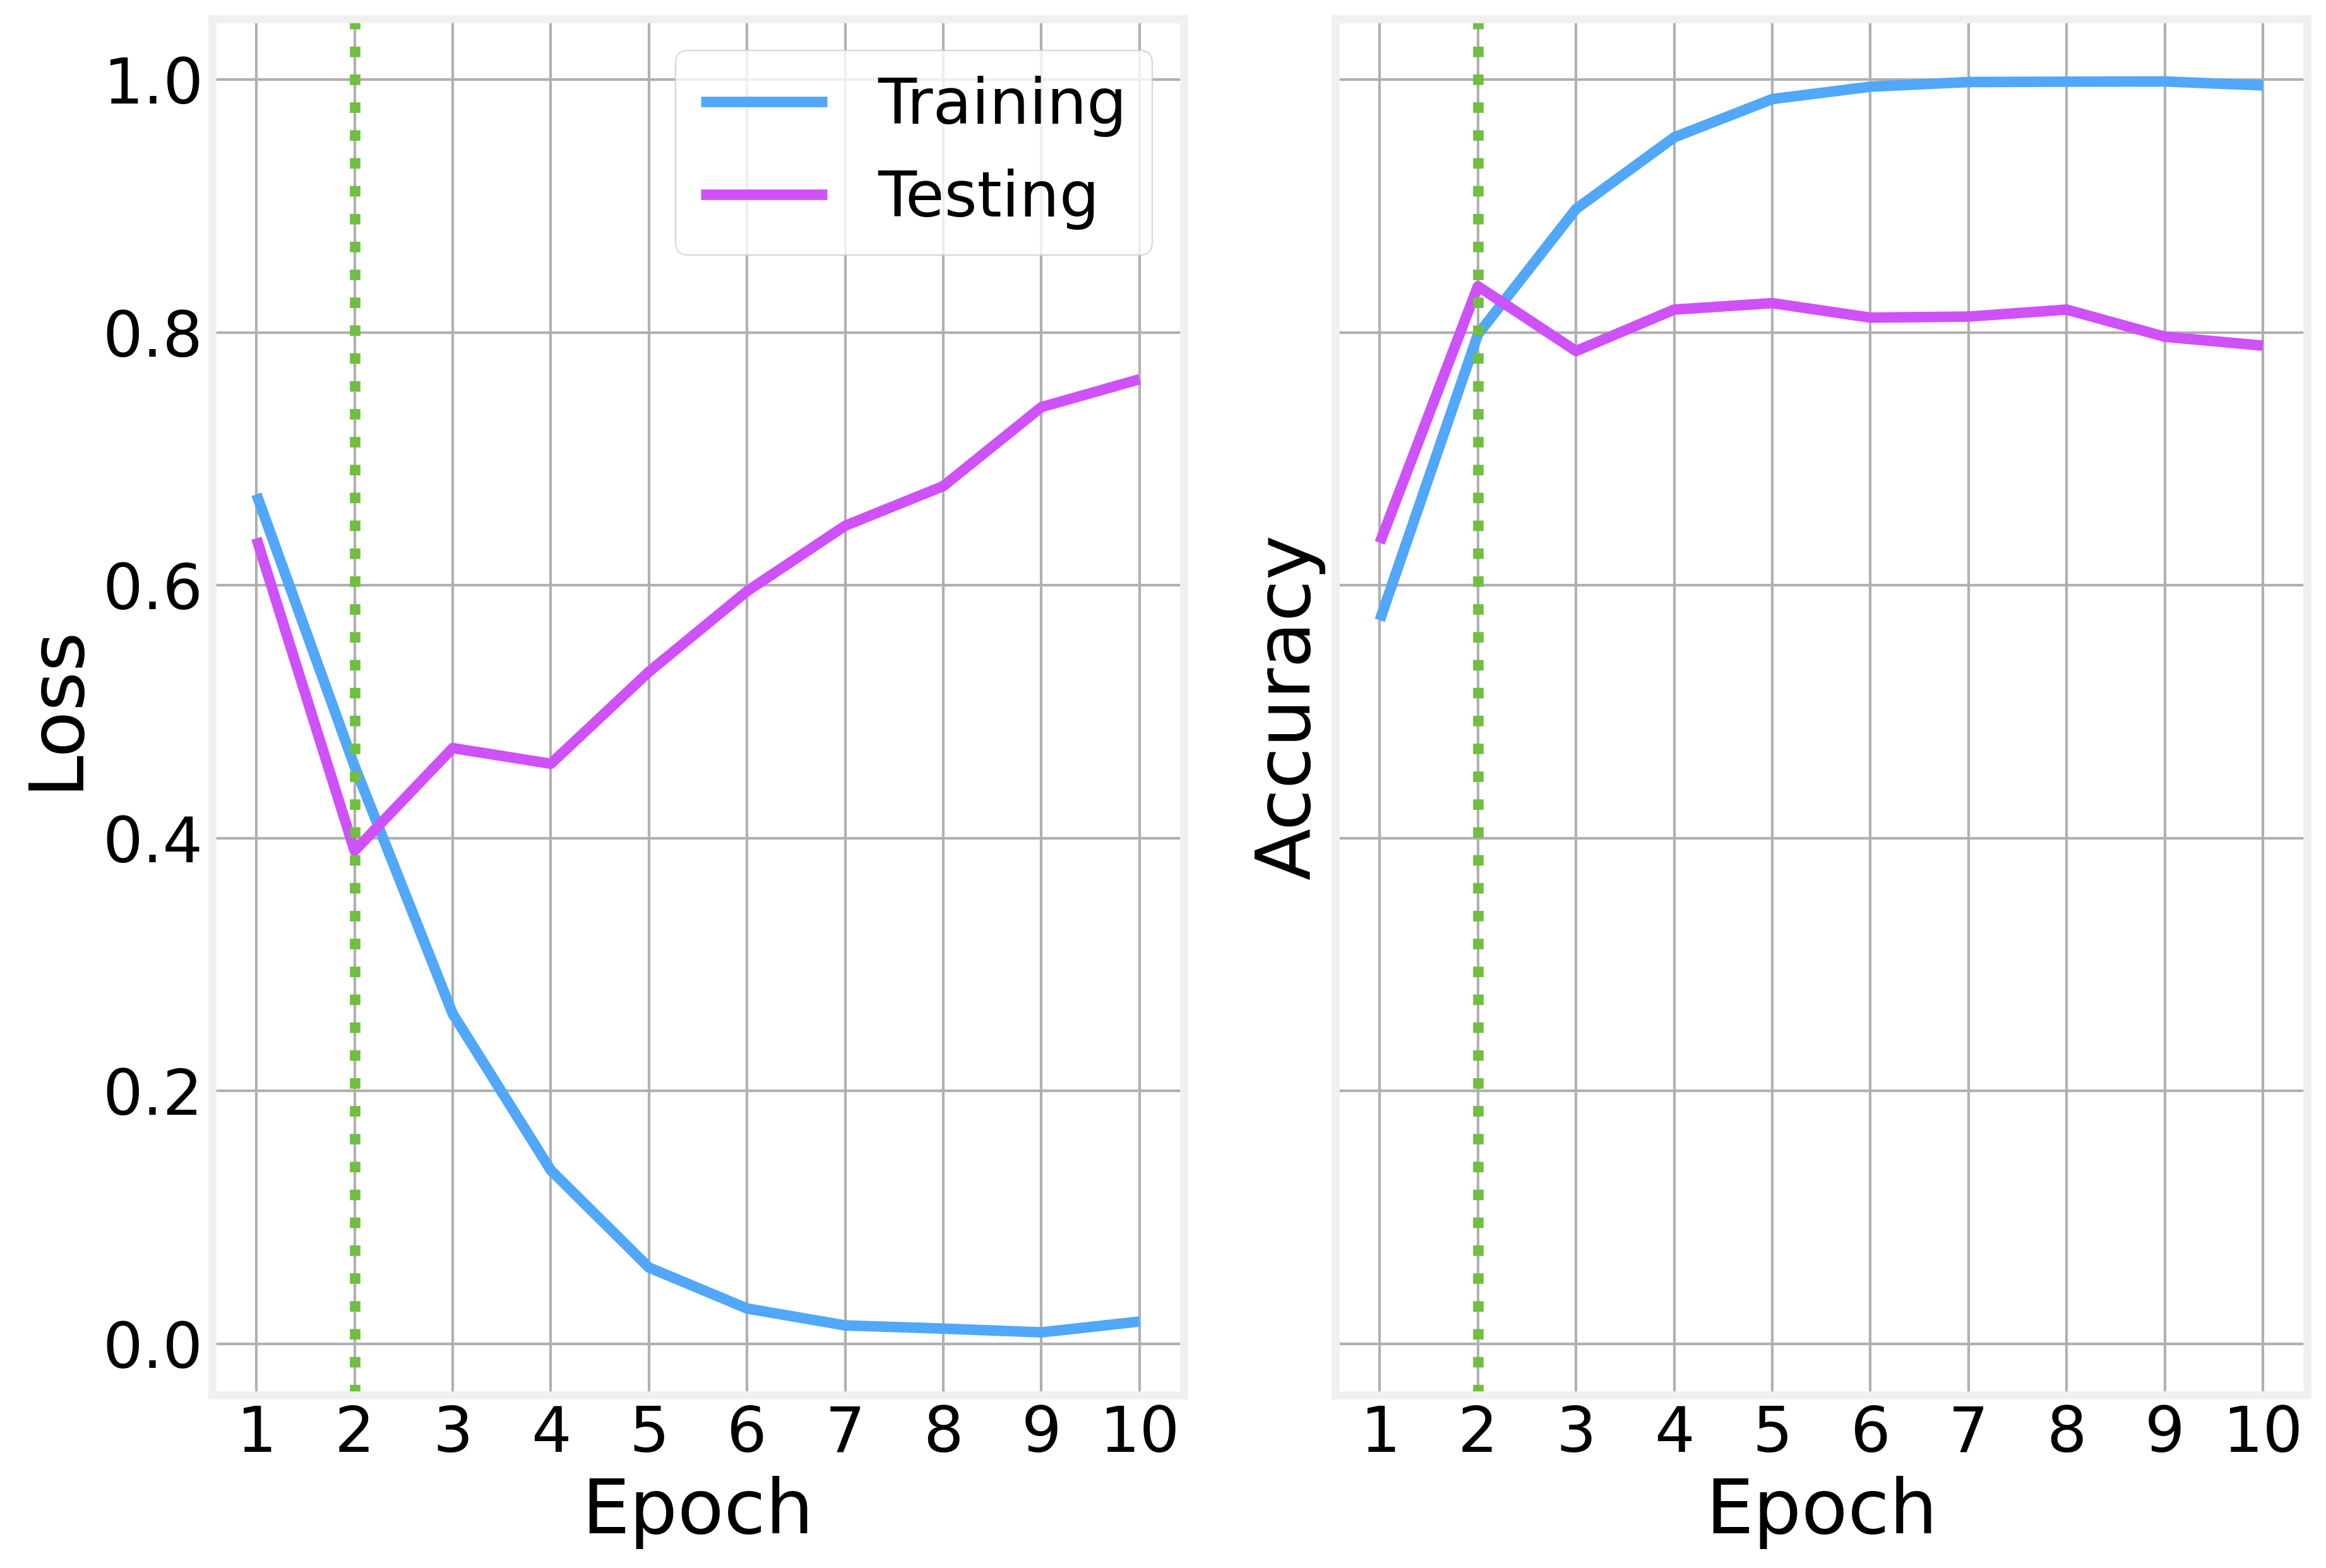

In [10]:
plot_history(history)

# GRU

In [11]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(GRU(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 32s 155ms/step - loss: 0.4822 - accuracy: 0.7520 - val_loss: 0.3377 - val_accuracy: 0.8588
Epoch 2/10
196/196 [==============================] - 29s 146ms/step - loss: 0.2517 - accuracy: 0.9010 - val_loss: 0.3160 - val_accuracy: 0.8702
Epoch 3/10
196/196 [==============================] - 29s 150ms/step - loss: 0.1917 - accuracy: 0.9302 - val_loss: 0.3706 - val_accuracy: 0.8570
Epoch 4/10
196/196 [==============================] - 29s 150ms/step - loss: 0.1581 - accuracy: 0.9448 - val_loss: 0.3500 - val_accuracy: 0.8630
Epoch 5/10
196/196 [==============================] - 29s 150ms/step - loss: 0.1393 - accuracy: 0.9509 - val_loss: 0.4108 - val_accuracy: 0.8622
Epoch 6/10
196/196 [==============================] - 30s 152ms/step - loss: 0.1236 - accuracy: 0.9568 - val_loss: 0.4009 - val_accuracy: 0.8610
Epoch 7/10
196/196 [==============================] - 30s 151ms/step - loss: 0.1024 - accuracy: 0.9670 - val_loss: 0.4495 - val_ac

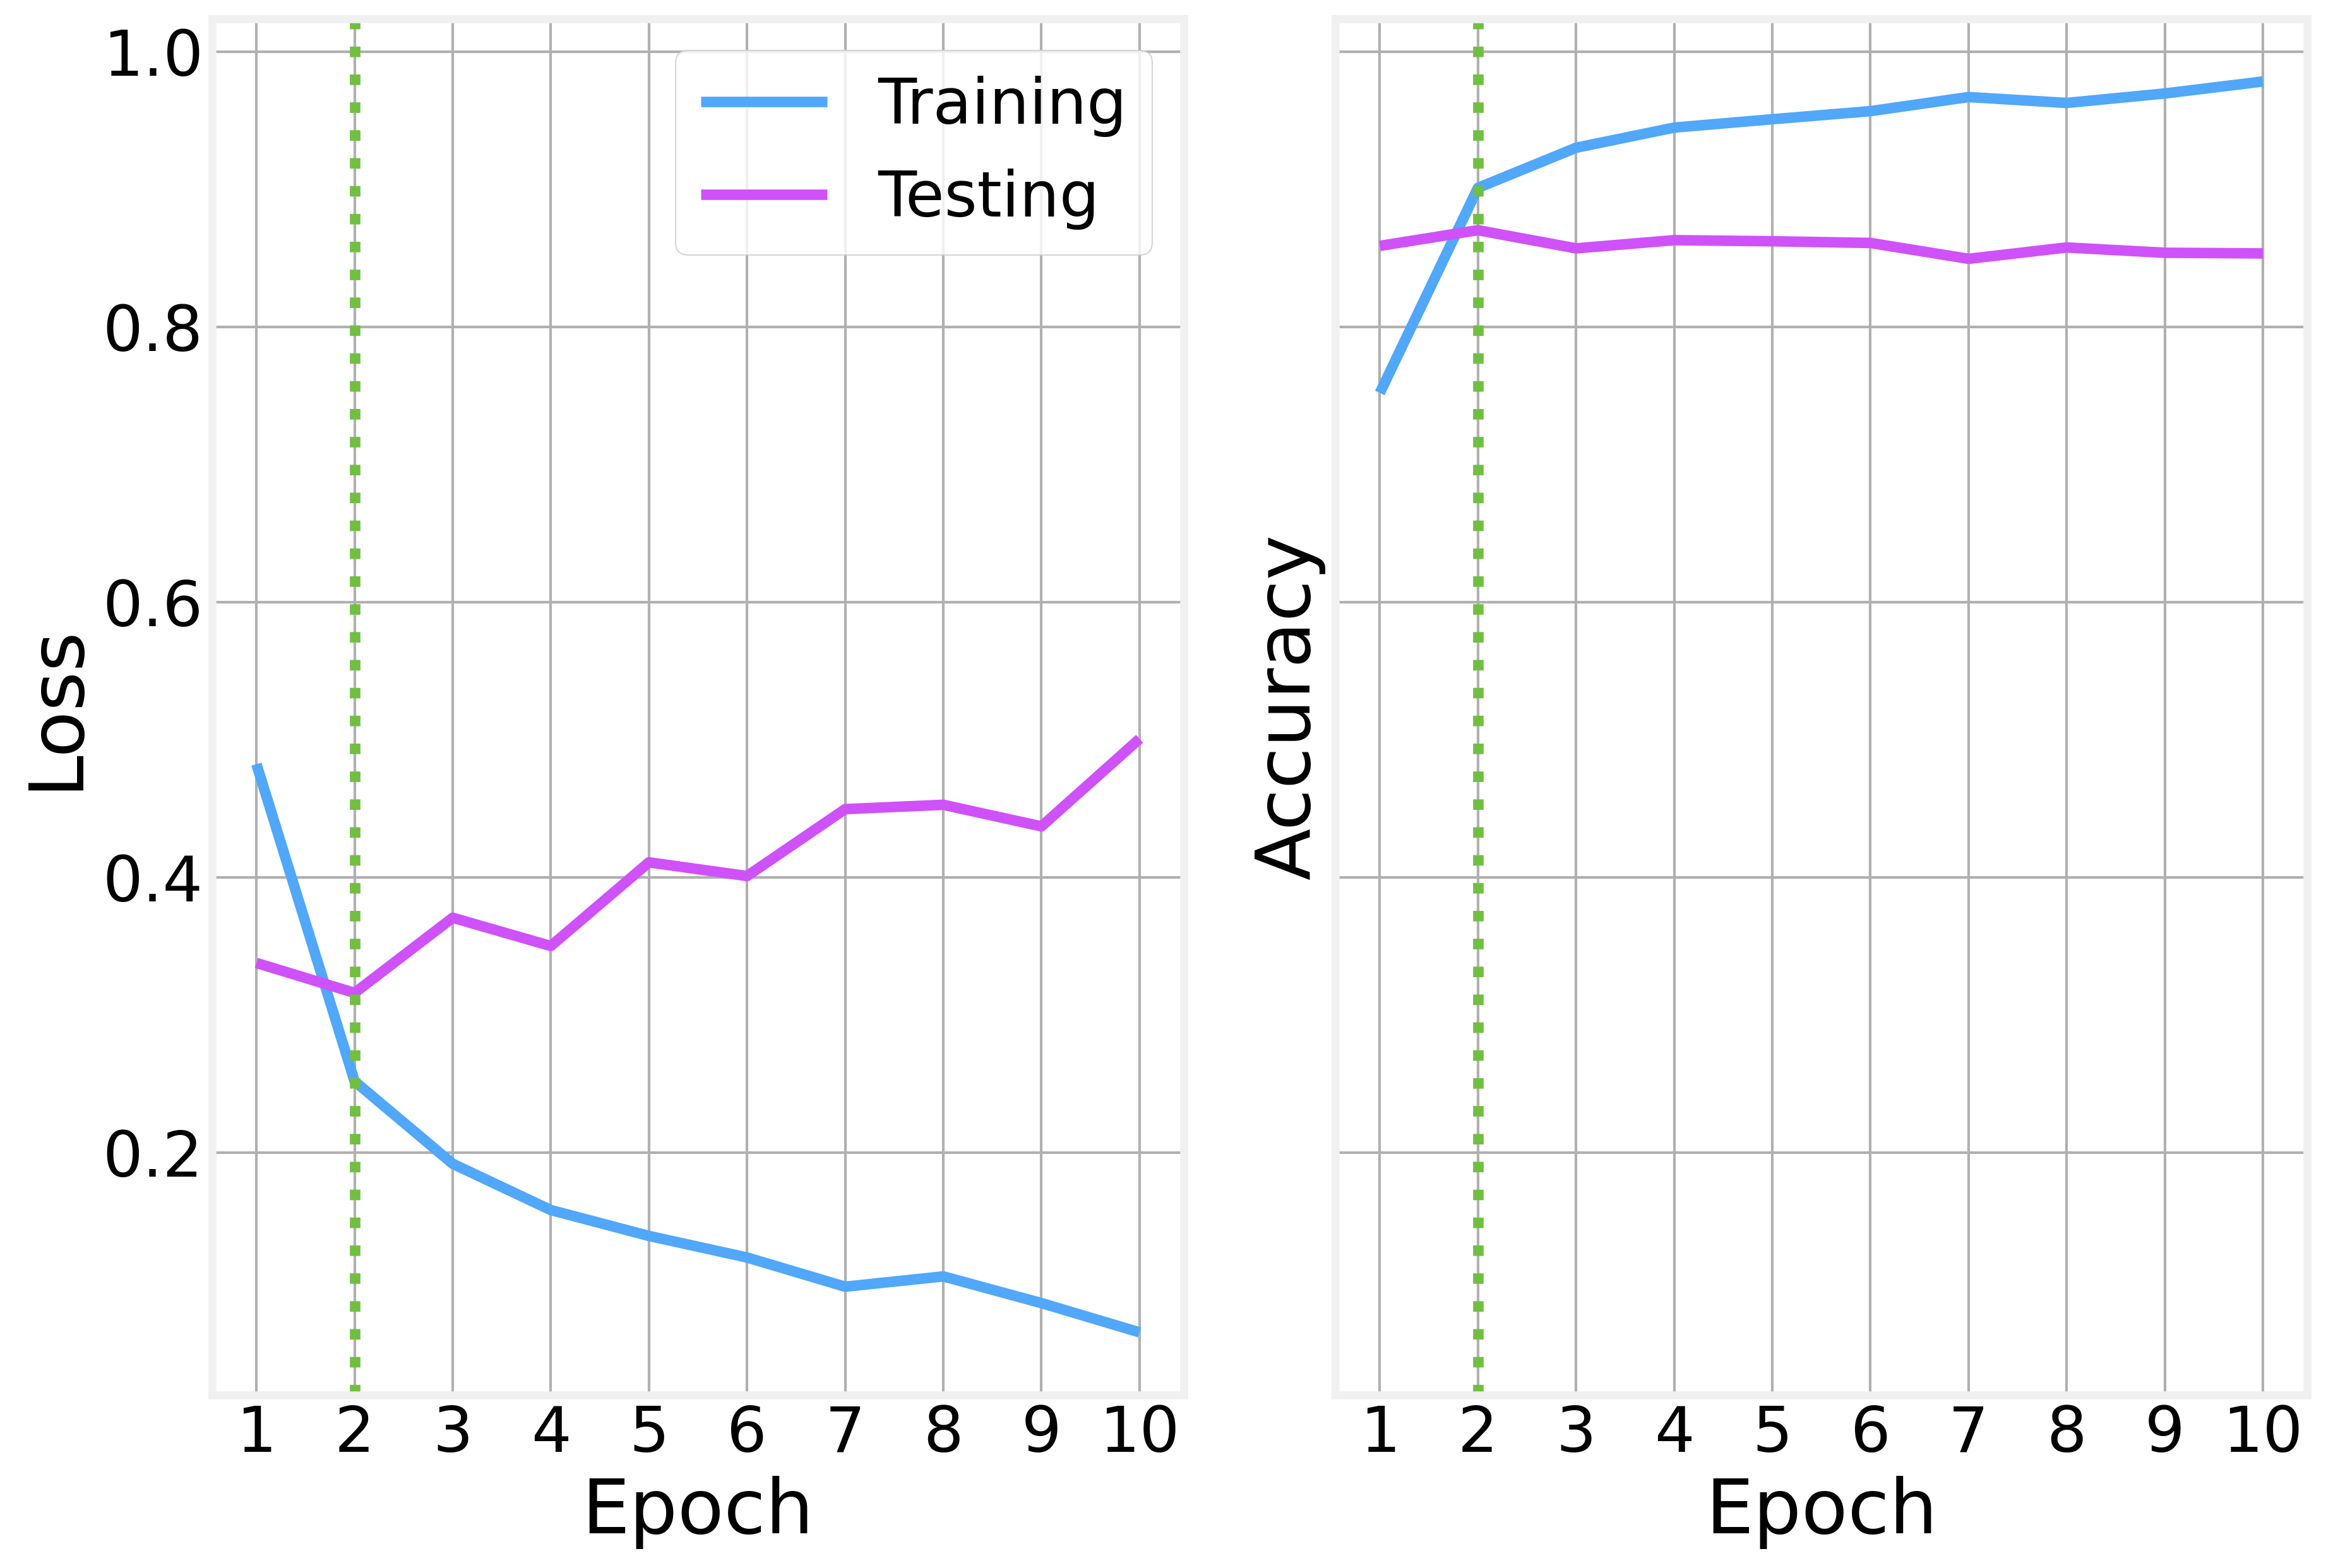

In [13]:
plot_history(history)

# LSTM

In [14]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(LSTM(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 56s 277ms/step - loss: 0.4754 - accuracy: 0.7679 - val_loss: 0.3506 - val_accuracy: 0.8493
Epoch 2/10
196/196 [==============================] - 64s 329ms/step - loss: 0.2543 - accuracy: 0.9023 - val_loss: 0.3774 - val_accuracy: 0.8665
Epoch 3/10
196/196 [==============================] - 61s 312ms/step - loss: 0.1867 - accuracy: 0.9327 - val_loss: 0.2994 - val_accuracy: 0.8785
Epoch 4/10
196/196 [==============================] - 60s 307ms/step - loss: 0.1467 - accuracy: 0.9491 - val_loss: 0.3593 - val_accuracy: 0.8704
Epoch 5/10
196/196 [==============================] - 48s 245ms/step - loss: 0.1273 - accuracy: 0.9552 - val_loss: 0.3837 - val_accuracy: 0.8667
Epoch 6/10
196/196 [==============================] - 47s 241ms/step - loss: 0.0995 - accuracy: 0.9670 - val_loss: 0.4137 - val_accuracy: 0.8698
Epoch 7/10
196/196 [==============================] - 44s 224ms/step - loss: 0.0872 - accuracy: 0.9705 - val_loss: 0.4348 - val_ac

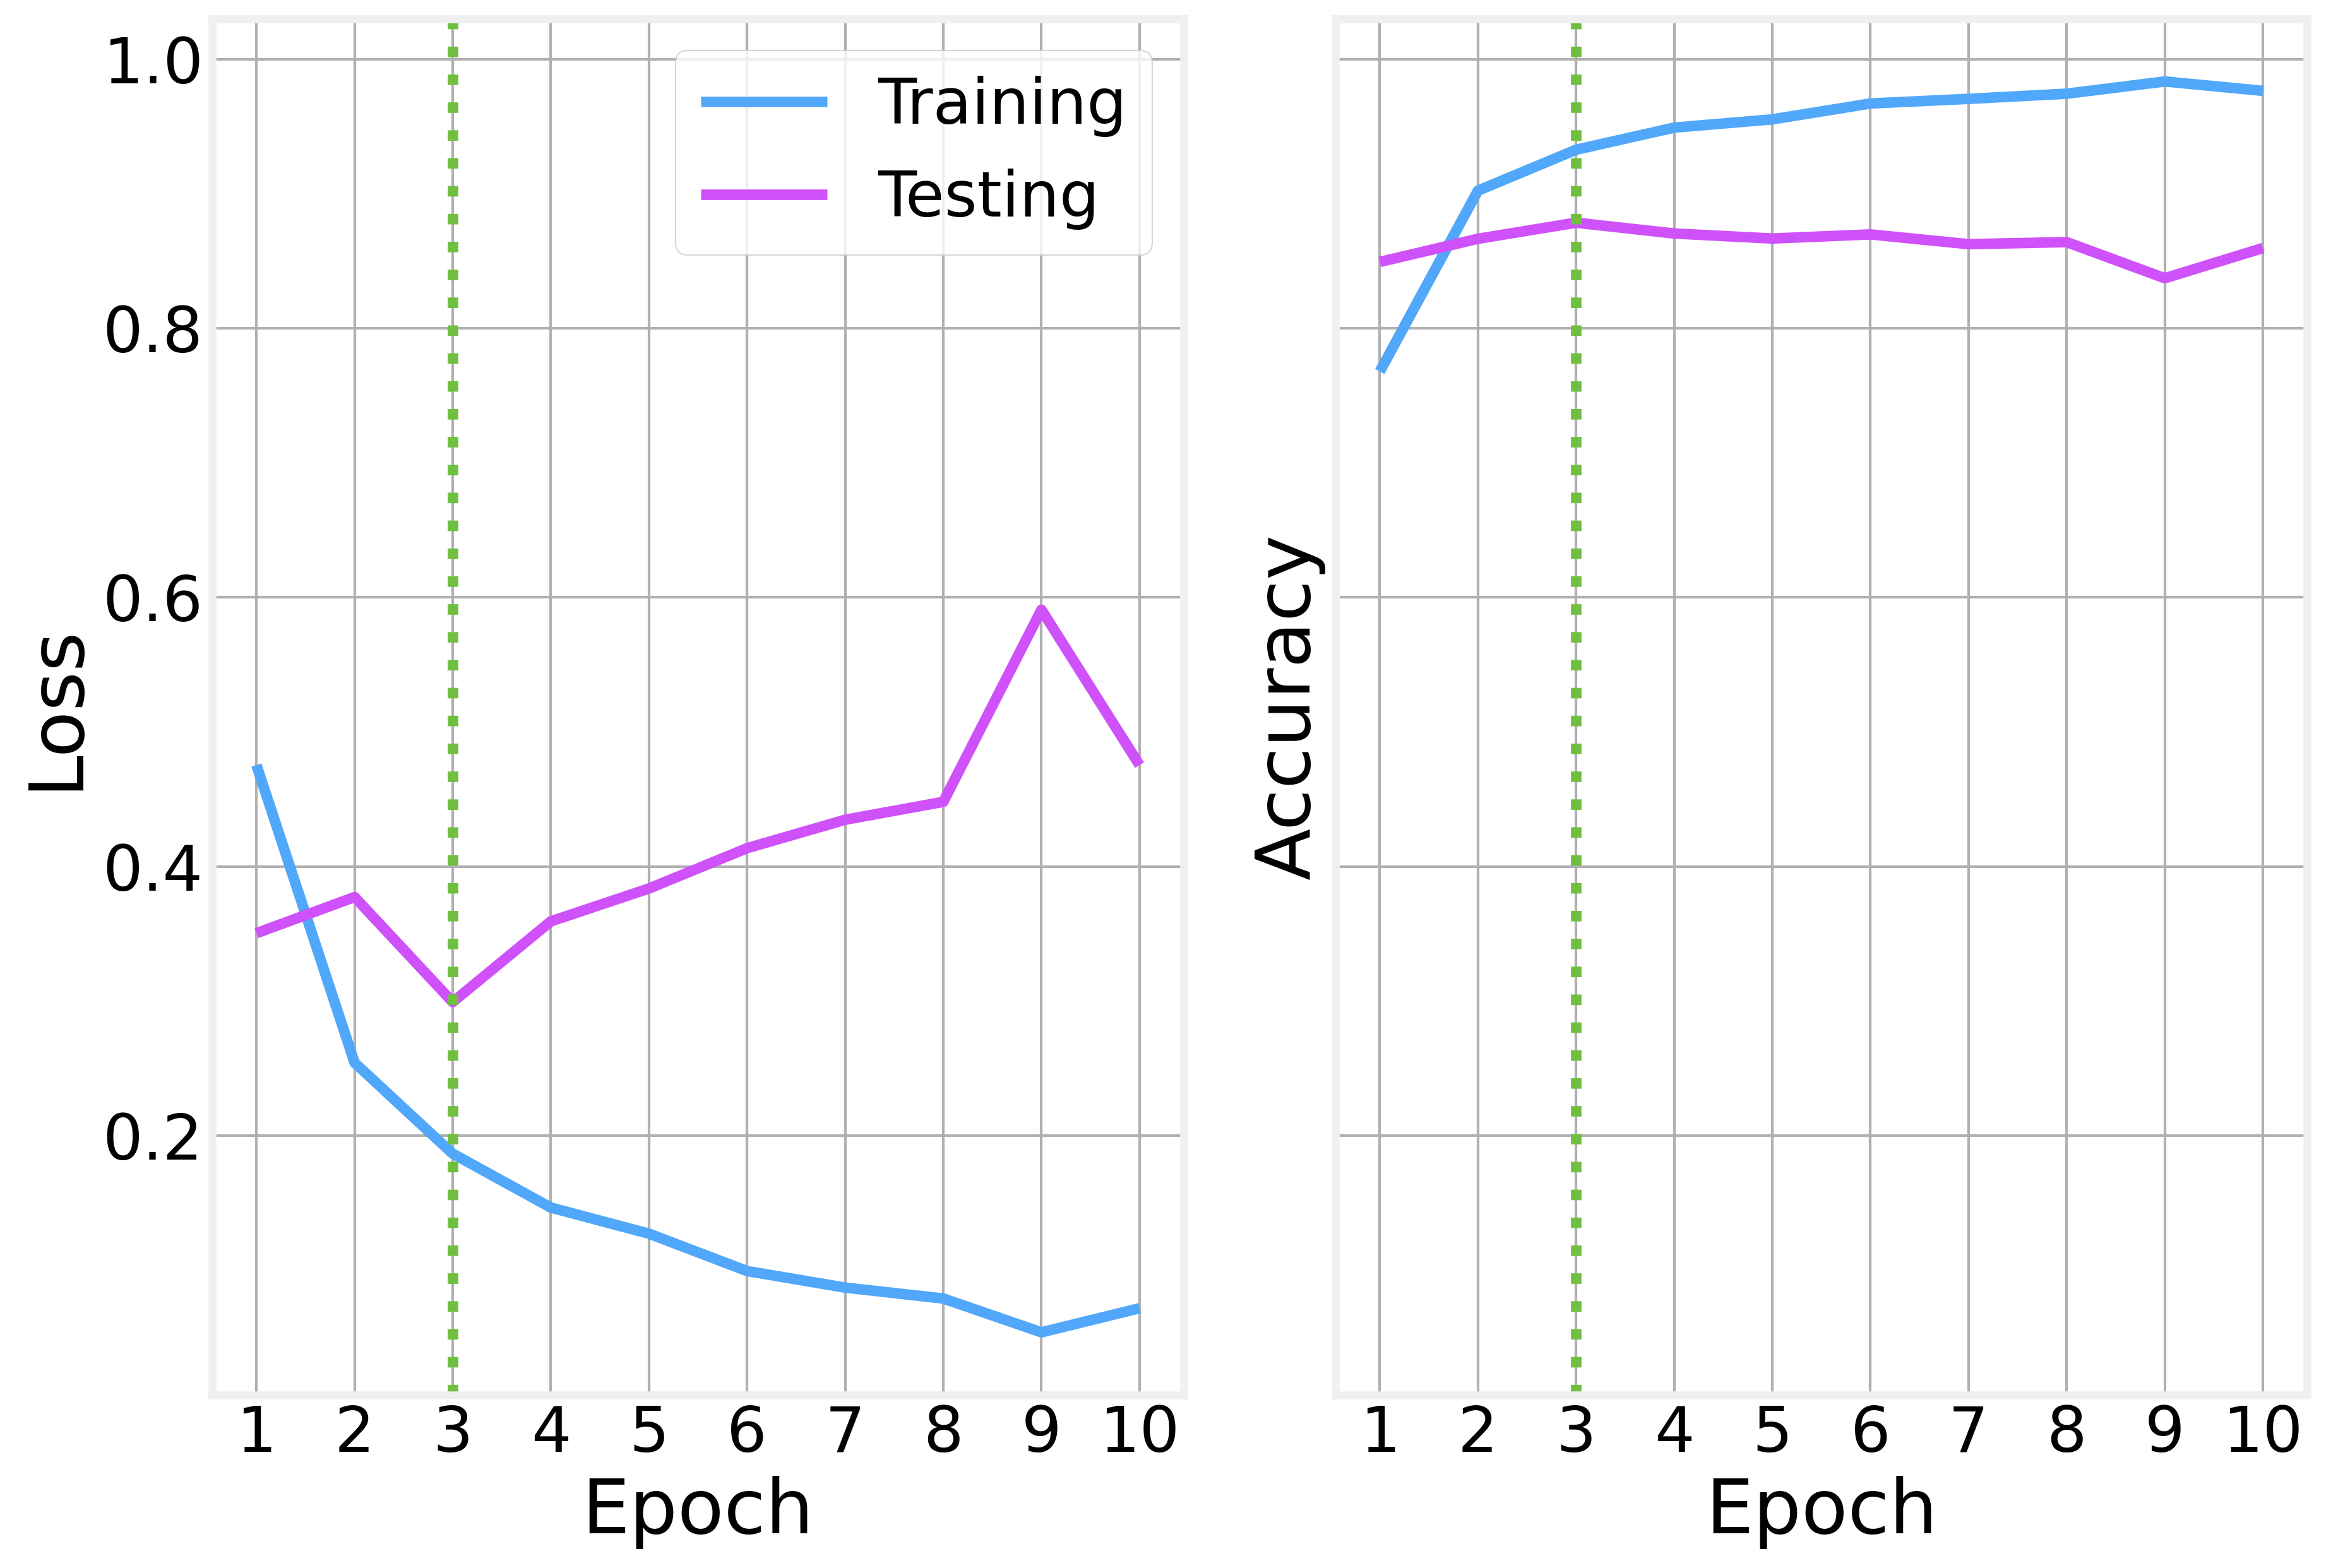

In [16]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>